In [29]:
import sys
sys.path.append("./../../src")
from visualizer_helper import Visualizer

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.sparse import csr_matrix
import scipy
import pickle
import os
from annoy import AnnoyIndex
from scipy.sparse.linalg import inv
import hdbscan

large_file_path = "../../../large_data_files"

k_neighbors = 500

A = pickle.load(open(os.path.join(large_file_path, "A_mknn_CLEANED_K{}_CSR.p".format(k_neighbors)), "rb"))

D = pickle.load(open("./data/D_mknn_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc = pickle.load(open("./data/D_mc_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

D_inv_sqrt = pickle.load(open("./data/D_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc_inv_sqrt = pickle.load(open("./data/D_mc_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))

L = pickle.load(open("./data/L_mknn_CLEANED_K{}_CSR.p".format(k_neighbors), "rb")).toarray()
L_mc = pickle.load(open("./data/L_mc_mknn_CLEANED_K{}_CSR.p".format(k_neighbors), "rb")).toarray()


In [30]:
A.shape

(46061, 46061)

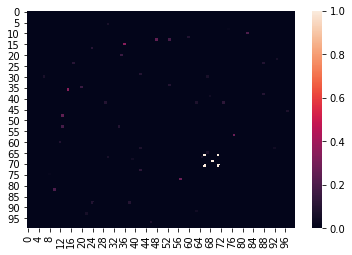

In [31]:
sns.heatmap(A[:100, :100].todense())

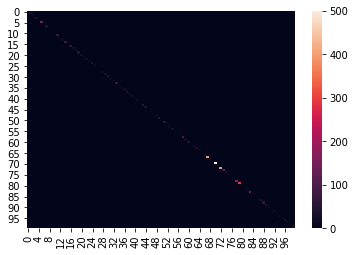

In [32]:
sns.heatmap(D[:100, :100].todense())

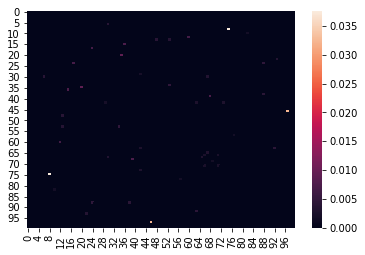

In [33]:
sns.heatmap(L[:100, :100])

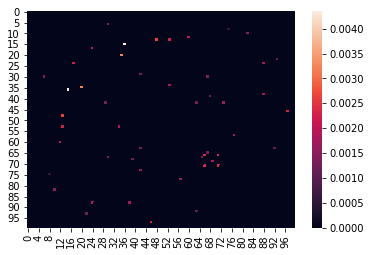

In [34]:
sns.heatmap(L_mc[:100, :100])

In [35]:
L_evals, L_evecs = scipy.sparse.linalg.eigsh(L, k=50, which="LM")
L_mc_evals, L_mc_evecs = scipy.sparse.linalg.eigsh(L_mc, k=50, which="LM")
pickle.dump(L_evecs, open("./data/L_evecs50_K{}.p".format(k_neighbors), 'wb'))
pickle.dump(L_mc_evecs, open("./data/L_mc_evecs50_K{}.p".format(k_neighbors), "wb"))
pickle.dump(L_evals, open("./data/L_evals50_K{}.p".format(k_neighbors), "wb"))
pickle.dump(L_mc_evals, open("./data/L_mc_evals50_K{}.p".format(k_neighbors), "wb"))

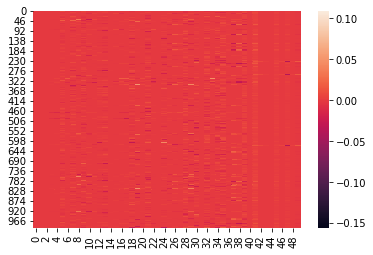

In [36]:
sns.heatmap(L_evecs[:1000, :1000])

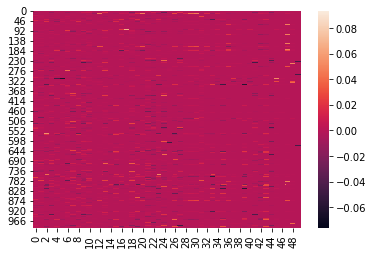

In [37]:
sns.heatmap(L_mc_evecs[:1000, :1000])

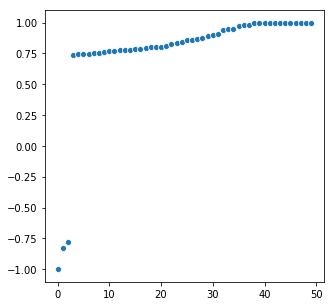

In [38]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_evals)

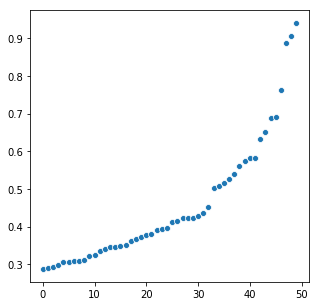

In [39]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_mc_evals)

In [40]:
evecs_to_plot=10
L_k_evecs = L_evecs[:, -evecs_to_plot:]
L_mc_k_evecs = L_mc_evecs[:, -evecs_to_plot:]

evec_cols = ["Evec_{}".format(i) for i in range(evecs_to_plot)]

L_evec_df = pd.DataFrame(L_k_evecs, columns=evec_cols)
L_mc_evec_df = pd.DataFrame(L_mc_k_evecs, columns=evec_cols)
print(L_evec_df.describe())
print(L_mc_evec_df.describe())

             Evec_0        Evec_1        Evec_2        Evec_3        Evec_4  \
count  46061.000000  46061.000000  46061.000000  46061.000000  46061.000000   
mean       0.000037      0.003333      0.000072     -0.000012     -0.000026   
std        0.004659      0.003256      0.004659      0.004659      0.004659   
min       -0.144797     -0.193546     -0.200209     -0.551210     -0.803284   
25%        0.000018      0.001861     -0.000061     -0.000003     -0.000006   
50%        0.000025      0.002610     -0.000043     -0.000002     -0.000004   
75%        0.000036      0.003772     -0.000030     -0.000002     -0.000003   
max        0.764521      0.230364      0.564058      0.354045      0.148839   

             Evec_5        Evec_6        Evec_7        Evec_8        Evec_9  
count  46061.000000  46061.000000  46061.000000  46061.000000  46061.000000  
mean       0.001556      0.000004      0.000609      0.000036     -0.000618  
std        0.004392      0.004659      0.004619      0